In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [4]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
data = pd.read_csv('creditcard.csv')


In [6]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
print(data.tail())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

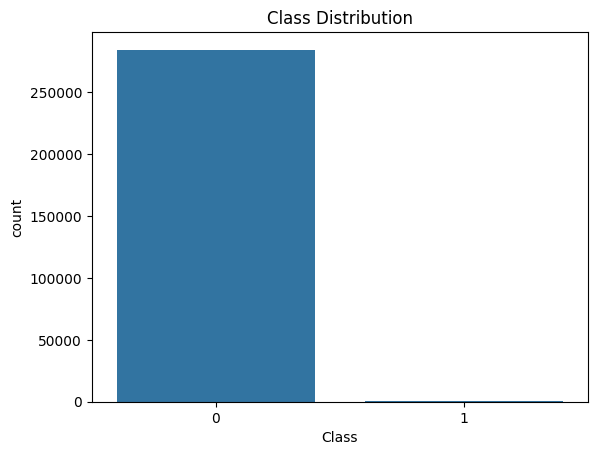

In [11]:
#visualize the data

sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


In [13]:
data = data.dropna()

In [14]:
X = data.drop('Class', axis=1)
y = 
data['Class']

In [15]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


In [17]:
#normalize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
#Use SMOTE (Synthetic Minority Over-sampling Technique)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [19]:
#Use Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)



In [20]:
#Combine Over-sampling and Under-sampling in a Pipeline

In [21]:
over_sampler = SMOTE(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
pipeline = Pipeline(steps=[('o', over_sampler), ('u', under_sampler)])
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)


**Train Model**

In [22]:
#Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)


LogisticRegression()

In [23]:
#Random Forest

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)


RandomForestClassifier()

**Evalution**

In [24]:
#Make prediction

In [25]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)


In [26]:
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression
[[55425  1439]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [27]:
print("Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
[[56856     8]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**cal Accuracy**

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
print("Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression
Confusion Matrix:
 [[55425  1439]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy Score: 0.9745970998209332


In [30]:
print("\nRandom Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier
Confusion Matrix:
 [[56856     8]
 [   15    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9995962220427653


In [31]:
print("Logistic Regression Accuracy value")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("\nRandom Forest Classifier Accuracy value")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy value
Accuracy Score: 0.9745970998209332

Random Forest Classifier Accuracy value
Accuracy Score: 0.9995962220427653


**create curve**

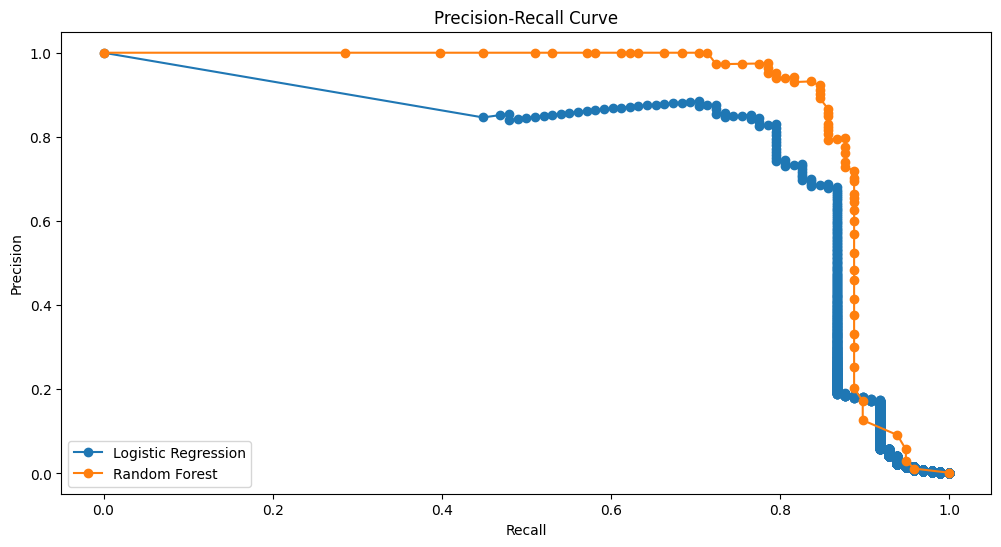

In [32]:
from sklearn.metrics import roc_auc_score

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_prob_log_reg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(12, 6))
plt.plot(recall_log_reg, precision_log_reg, marker='o', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='o', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [33]:
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_prob_log_reg))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Logistic Regression ROC AUC: 0.9785619896523606
Random Forest ROC AUC: 0.9748315529785352


**Hyperparameter Tuning**

In [34]:
#Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV


In [36]:
#logistic Regression

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, scoring='roc_auc')
grid_search_log_reg.fit(X_train_res, y_train_res)
best_log_reg = grid_search_log_reg.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [38]:
#Randon Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [42]:
import joblib

# Save the model
joblib.dump(best_log_reg, 'logistic_regression_model.pkl')



['logistic_regression_model.pkl']